In [1]:
# import everything needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from math import sqrt
from scipy import stats
from pydataset import data
from env import host, user, password
import warnings
warnings.filterwarnings("ignore")
import prepare
import acquire


In [2]:
#  creating some functions

def get_connection(db_name):
    '''
    This function creates the connection to the database
    '''
    from env import host, user, password
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

In [3]:
# sql query function
def get_new_telco_churn_data():
    '''
    Function pulls the telco data from the sql server and returns 
    a pandas dataframe

    '''
    sql_query = '''
    SELECT *
    FROM payment_types
    JOIN customers ON payment_types.payment_type_id = customers.payment_type_id
    JOIN internet_service_types ON internet_service_types.internet_service_type_id = customers.internet_service_type_id
    JOIN contract_types ON contract_types.contract_type_id = customers.contract_type_id;
    
    '''
    return pd.read_sql(sql_query, get_connection('telco_churn'))

In [4]:
df = get_new_telco_churn_data()

In [5]:
df.sample(3)

,payment_type_id,payment_type,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,internet_service_type_id,internet_service_type,contract_type_id,contract_type
6824,4,Credit card (automatic),6631-HMANX,Male,0,Yes,No,72,Yes,Yes,...,3,Yes,4,85.45,6227.5,No,1,DSL,3,Two year
5807,3,Bank transfer (automatic),7205-BAIAD,Female,0,No,No,40,Yes,No,...,3,Yes,3,20.60,827.3,No,3,None,3,Two year
2002,1,Electronic check,6845-RGTYS,Female,0,Yes,No,47,Yes,Yes,...,1,Yes,1,98.75,4533.7,Yes,2,Fiber optic,1,Month-to-month


In [6]:
df.shape

(7043, 27)

In [7]:
df = acquire.get_new_telco_churn_data()
churned_df = df[df['churn']=='Yes']

In [8]:
df.sample(3).T

,6663,2726,4913
payment_type_id,3,3,3
payment_type,Bank transfer (automatic),Bank transfer (automatic),Bank transfer (automatic)
customer_id,4293-ETKAP,0733-VUNUW,2450-ZKEED
gender,Female,Male,Female
senior_citizen,0,0,0
partner,Yes,No,No
dependents,Yes,No,No
tenure,65,24,11
phone_service,Yes,Yes,Yes
multiple_lines,Yes,Yes,No


In [9]:
churned_df.sample().T

,738
payment_type_id,1
payment_type,Electronic check
customer_id,0970-ETWGE
gender,Male
senior_citizen,0
partner,No
dependents,No
tenure,1
phone_service,Yes
multiple_lines,No


In [10]:
# getting all the value counts from the telco churn data

columns = ['payment_type', 'gender', 'senior_citizen', 'partner', 'dependents', 'phone_service', 'multiple_lines', 
           'online_security', 'online_backup', 'device_protection', 'tech_support',
          'streaming_tv', 'streaming_movies', 'paperless_billing',
          'monthly_charges', 'total_charges', 'churn', 'internet_service_type', 'contract_type']

for col in columns:
    print(col)
    print(churned_df[col].value_counts())
    print('----------------------------')

payment_type
Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: payment_type, dtype: int64
----------------------------
gender
Female    939
Male      930
Name: gender, dtype: int64
----------------------------
senior_citizen
0    1393
1     476
Name: senior_citizen, dtype: int64
----------------------------
partner
No     1200
Yes     669
Name: partner, dtype: int64
----------------------------
dependents
No     1543
Yes     326
Name: dependents, dtype: int64
----------------------------
phone_service
Yes    1699
No      170
Name: phone_service, dtype: int64
----------------------------
multiple_lines
Yes                 850
No                  849
No phone service    170
Name: multiple_lines, dtype: int64
----------------------------
online_security
No                     1461
Yes                     295
No internet service     113
Name: online_security, dtype: int64
---------------------------

Columns that effect churn are:
contract_type and contract_type_id
internet_service_type and internet_service_type_id
paperless_billing
tech_support
device_protection
online_backup
online_security
phone_service
dependents
partner
senior_citizen
payment type and payment_type_id


Other factors to consider are tenure, monthly charges and total charges.


We can drop some of the other columns

In [11]:
# create a df for churned customers
churned_df = df[df['churn']=='Yes']

Create functions

In [12]:
def prep_telco_data(df):
    '''
    Cleaning up the telco data
    '''

    # drop duplicate columns
    df = df.loc[:, ~df.columns.duplicated()]

    # replace blanks with nan and drop the nulls from the columns
    df = df.replace(' ', np.nan)
    df.dropna(inplace=True)
    # change  total_charges from a string to a float so it can be calculated
    df.total_charges = df.total_charges.astype('float')
    
    # drop uneccessary columns
    df = df.drop(columns=['streaming_movies', 'streaming_tv', 'multiple_lines', 'gender',
                         'contract_type_id', 'internet_service_type_id', 'payment_type_id'])
    
    # rename the tenure column
    df = df.rename(columns={'tenure': 'tenure_in_months'})

    # changing yes and no's to 1 and 0
    columns = ['partner', 'dependents', 'phone_service', 'online_security', 'online_backup', 
               'device_protection', 'tech_support', 'paperless_billing', 'churn']

    for cols in columns:
        df[cols] = np.where(df[cols] == 'Yes', 1, 0)

    return df



def create_dummies(df):
    '''
    Creating dummy columns for non-binary ones
    '''
    
    #payment_type, internet_service_type, and contract_type
    payment_dummies = pd.get_dummies(df.payment_type, drop_first=True)
    internet_dummies = pd.get_dummies(df.internet_service_type, drop_first=False)
    contract_dummies = pd.get_dummies(df.contract_type, drop_first=True)
    
    #  concatenate the two dataframes
    df = pd.concat([df, payment_dummies, internet_dummies, contract_dummies], axis=1)
    
    # dropping the new duplicates
    df = df.drop(columns=['None', 'payment_type', 'contract_type', 'internet_service_type'])
    
    return df


def telco_split(df):
    '''
    Splits it into train, test, and validate dataframes for my model
    '''

    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123)
    return train, validate, test

In [13]:
df = prepare.prep_telco_data(df)

In [14]:
df.sample().T

,6690
payment_type,Bank transfer (automatic)
customer_id,4835-YSJMR
senior_citizen,0
partner,0
dependents,0
tenure_in_months,39
phone_service,1
online_security,0
online_backup,0
device_protection,0


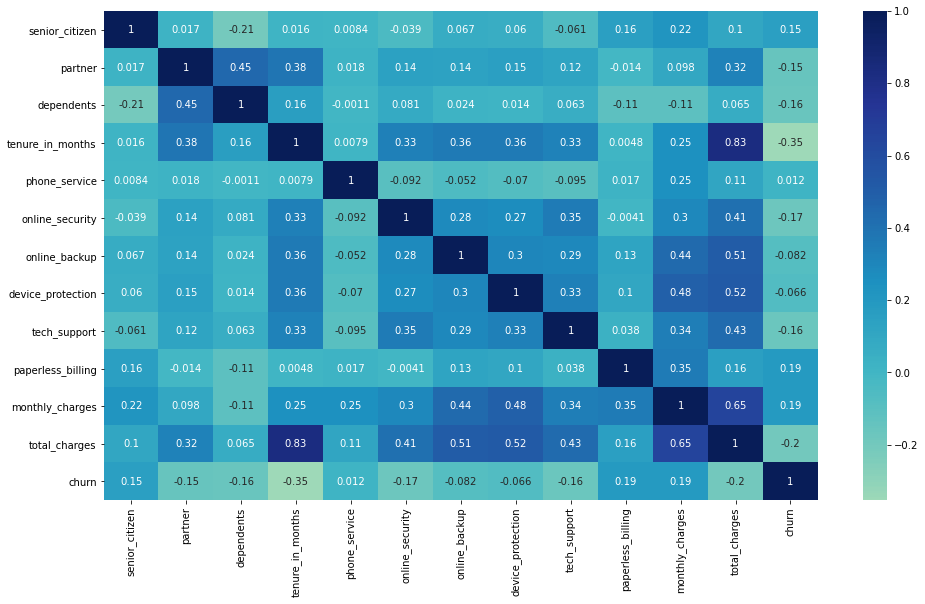

In [15]:
plt.figure(figsize=(16, 9))
sns.heatmap(((df.corr())), cmap='YlGnBu', center=0, annot=True)

plt.title('')
plt.show()

In [16]:
correl = df.corr()
correl.T

,senior_citizen,partner,dependents,tenure_in_months,phone_service,online_security,online_backup,device_protection,tech_support,paperless_billing,monthly_charges,total_charges,churn
senior_citizen,1.000000,0.016957,-0.210550,0.015683,0.008392,-0.038576,0.066663,0.059514,-0.060577,0.156258,0.219874,0.102411,0.150541
partner,0.016957,1.000000,0.452269,0.381912,0.018397,0.143346,0.141849,0.153556,0.120206,-0.013957,0.097825,0.319072,-0.149982
dependents,-0.210550,0.452269,1.000000,0.163386,-0.001078,0.080786,0.023639,0.013900,0.063053,-0.110131,-0.112343,0.064653,-0.163128
tenure_in_months,0.015683,0.381912,0.163386,1.000000,0.007877,0.328297,0.361138,0.361520,0.325288,0.004823,0.246862,0.825880,-0.354049
phone_service,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.091676,-0.052133,-0.070076,-0.095138,0.016696,0.248033,0.113008,0.011691
online_security,-0.038576,0.143346,0.080786,0.328297,-0.091676,1.000000,0.283285,0.274875,0.354458,-0.004051,0.296447,0.412619,-0.171270
online_backup,0.066663,0.141849,0.023639,0.361138,-0.052133,0.283285,1.000000,0.303058,0.293705,0.127056,0.441529,0.510100,-0.082307
device_protection,0.059514,0.153556,0.013900,0.361520,-0.070076,0.274875,0.303058,1.000000,0.332850,0.104079,0.482607,0.522881,-0.066193
tech_support,-0.060577,0.120206,0.063053,0.325288,-0.095138,0.354458,0.293705,0.332850,1.000000,0.037536,0.338301,0.432868,-0.164716
paperless_billing,0.156258,-0.013957,-0.110131,0.004823,0.016696,-0.004051,0.127056,0.104079,0.037536,1.000000,0.351930,0.157830,0.191454


Text(0.5, 1.0, 'Columns effecting churn')

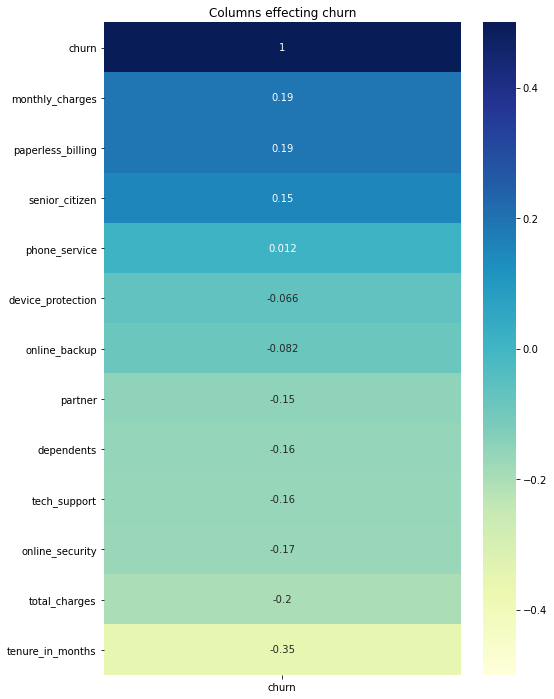

In [87]:
plt.figure(figsize=(8,12))
churn_heatmap = sns.heatmap(df.corr()[['churn']].sort_values(by='churn', ascending=False), cmap='YlGnBu', vmin=-.5, vmax=.5, annot=True)
churn_heatmap.set_title('Columns effecting churn')

In [18]:
churned_df = df[df['churn']==1]
churned_df.sample(3).T

,4605,2642,2903
payment_type,Electronic check,Electronic check,Credit card (automatic)
customer_id,6664-FPDAC,9944-HKVVB,2187-LZGPL
senior_citizen,1,0,0
partner,0,0,0
dependents,0,0,0
tenure_in_months,56,3,7
phone_service,1,1,0
online_security,0,0,0
online_backup,1,1,1
device_protection,1,0,0


In [19]:
churned_df.sample().T

,1119
payment_type,Electronic check
customer_id,2845-AFFTX
senior_citizen,1
partner,1
dependents,0
tenure_in_months,41
phone_service,1
online_security,0
online_backup,0
device_protection,1


EXPLORE

In [20]:
#  Do monthly charges cause churn
df.monthly_charges.mean(), churned_df.monthly_charges.mean()

(64.79820819112616, 74.44133226324224)

Text(0, 0.5, 'amount of customers')

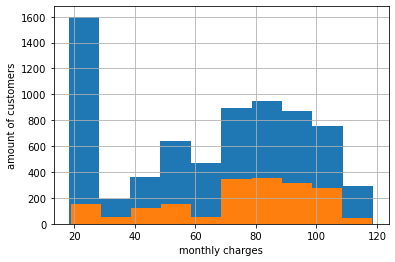

In [21]:
# churned customers pay the highest monthly fees
df.monthly_charges.hist()
churned_df.monthly_charges.hist()
plt.xlabel('monthly cost')
plt.ylabel('number of customers')

In [22]:
df.total_charges.mean(), churned_df.total_charges.mean()

(2283.300440841863, 1531.7960941680042)

Text(0, 0.5, 'amount of customers')

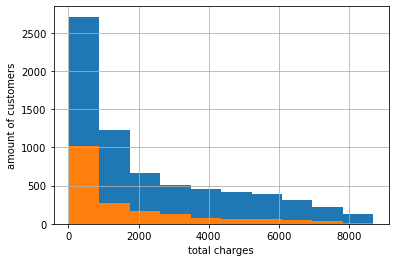

In [23]:
# comparing to total charges
df.total_charges.hist()
churned_df.total_charges.hist()
plt.xlabel('total charges')
plt.ylabel('amount of customers')

Text(0, 0.5, 'amount of customers')

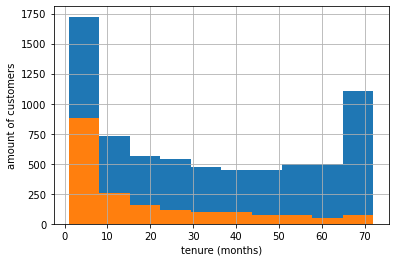

In [24]:
# comparing tenure
df.tenure_in_months.hist()
churned_df.tenure_in_months.hist()
plt.xlabel('tenure (months)')
plt.ylabel('amount of customers')

In [25]:
correl = df.corr()
correl.T

,senior_citizen,partner,dependents,tenure_in_months,phone_service,online_security,online_backup,device_protection,tech_support,paperless_billing,monthly_charges,total_charges,churn
senior_citizen,1.000000,0.016957,-0.210550,0.015683,0.008392,-0.038576,0.066663,0.059514,-0.060577,0.156258,0.219874,0.102411,0.150541
partner,0.016957,1.000000,0.452269,0.381912,0.018397,0.143346,0.141849,0.153556,0.120206,-0.013957,0.097825,0.319072,-0.149982
dependents,-0.210550,0.452269,1.000000,0.163386,-0.001078,0.080786,0.023639,0.013900,0.063053,-0.110131,-0.112343,0.064653,-0.163128
tenure_in_months,0.015683,0.381912,0.163386,1.000000,0.007877,0.328297,0.361138,0.361520,0.325288,0.004823,0.246862,0.825880,-0.354049
phone_service,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.091676,-0.052133,-0.070076,-0.095138,0.016696,0.248033,0.113008,0.011691
online_security,-0.038576,0.143346,0.080786,0.328297,-0.091676,1.000000,0.283285,0.274875,0.354458,-0.004051,0.296447,0.412619,-0.171270
online_backup,0.066663,0.141849,0.023639,0.361138,-0.052133,0.283285,1.000000,0.303058,0.293705,0.127056,0.441529,0.510100,-0.082307
device_protection,0.059514,0.153556,0.013900,0.361520,-0.070076,0.274875,0.303058,1.000000,0.332850,0.104079,0.482607,0.522881,-0.066193
tech_support,-0.060577,0.120206,0.063053,0.325288,-0.095138,0.354458,0.293705,0.332850,1.000000,0.037536,0.338301,0.432868,-0.164716
paperless_billing,0.156258,-0.013957,-0.110131,0.004823,0.016696,-0.004051,0.127056,0.104079,0.037536,1.000000,0.351930,0.157830,0.191454


Text(0.5, 1.0, 'Feautures  Correlating with Churn')

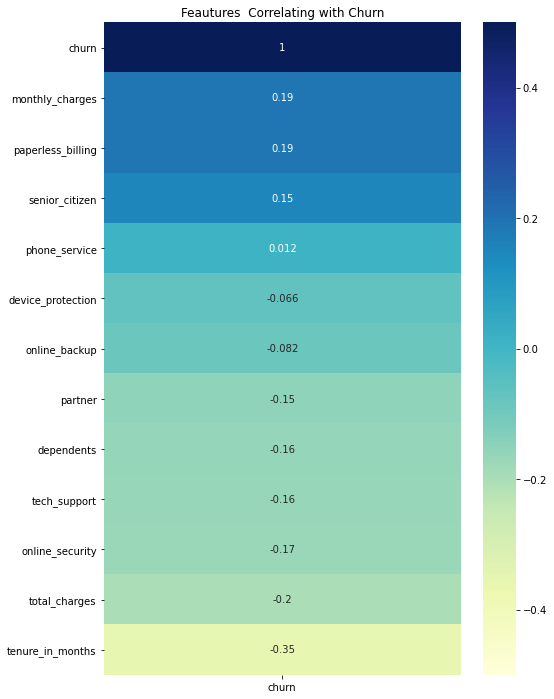

In [26]:
plt.figure(figsize=(8,12))
churn_heatmap = sns.heatmap(df.corr()[['churn']].sort_values(by='churn', ascending=False), cmap='YlGnBu', vmin=-.5, vmax=.5, annot=True)
churn_heatmap.set_title('Feautures  Correlating with Churn')

In [27]:
churned_df.sample().T

,2058
payment_type,Electronic check
customer_id,7112-OPOTK
senior_citizen,0
partner,0
dependents,0
tenure_in_months,33
phone_service,1
online_security,0
online_backup,0
device_protection,0


Columns that cause churn:
payment_type
internet_service_type
dependents
senior_citizen
contract_type

In [28]:
#splitting the data
train, validate, test = prepare.telco_split(df)

In [29]:
train.shape, validate.shape, test.shape

((3937, 17), (1688, 17), (1407, 17))

checking paperless biling and partners shows that paperless billing does not effect churn.

In [30]:
# set the alpha
alpha = 0.05

In [31]:
train.head().T

,5399,2876,659,5843,2229
payment_type,Mailed check,Electronic check,Mailed check,Bank transfer (automatic),Bank transfer (automatic)
customer_id,0831-JNISG,1963-SVUCV,0611-DFXKO,7696-CFTAT,7916-VCCPB
senior_citizen,0,0,0,0,0
partner,1,0,1,1,1
dependents,1,0,0,1,1
tenure_in_months,71,1,20,37,16
phone_service,1,1,1,1,1
online_security,0,0,0,0,0
online_backup,0,0,0,0,1
device_protection,0,0,0,0,0


In [32]:
observed = pd.crosstab(train.churn, train.paperless_billing)
observed

paperless_billing,0,1
churn,,
0,1382,1507
1,276,772


In [33]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [34]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[1382 1507]
 [ 276  772]]
---
Expected

[[1216 1672]
 [ 441  606]]
---

chi^2 = 144.9512
p     = 0.0000


In [35]:
if p < alpha:
    print('We reject the null hypothesis')
    print('We move forward with the alternate hypothesis. The two samples are associated')
else:
    print('We accept the alternate hypothesis')

We reject the null hypothesis
We move forward with the alternate hypothesis. The two samples are associated


Next stats test
${H_0}$ : Having a partner does not effect customer churn\ ${H_a}$ : Having a partner does effect customer churn

In [36]:
# another test on partners
observed = pd.crosstab(train.churn, train.partner)
observed

partner,0,1
churn,,
0,1376,1513
1,666,382


In [37]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [38]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:}')

Observed

[[1376 1513]
 [ 666  382]]
---
Expected

[[1498 1390]
 [ 543  504]]
---

chi^2 = 77.4423
p     = 1.3665799090892278e-18


In [39]:
if p < alpha:
    print('Null hypothesis is rejected')
else:
    print('We accept the alternate hypothesis')

Null hypothesis is rejected



${H_0}$: The mean monthly charges of churned customers = The mean monthly charges of all customers.\ ${H_a}$: The mean monthly charges of churned customers > the mean monthly charges of all customers.

In [41]:
# check the sample size
train.churn.value_counts()

0    2889
1    1048
Name: churn, dtype: int64

In [42]:
# get the t and p statistic
churn_sample = df[df.churn == 1].monthly_charges
overall_mean = df.monthly_charges.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

t, p/2, alpha

(16.901402342895597, 4.8013198895002845e-60, 0.05)

In [43]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


In [44]:
train.sample(3).T

,6271,4775,5600
payment_type,Bank transfer (automatic),Electronic check,Mailed check
customer_id,6797-LNAQX,9972-VAFJJ,3785-KTYSH
senior_citizen,0,1,0
partner,1,1,0
dependents,1,0,0
tenure_in_months,70,53,53
phone_service,1,1,1
online_security,0,0,0
online_backup,1,1,0
device_protection,0,1,0


MODELING
Statistics show that these effect churn:

paperless billing 
monthly charges 
partner

In [45]:
# keep my most valuable features on my split data and drop the rest
features = ['payment_type', 'senior_citizen', 'contract_type',
           'internet_service_type', 'dependents', 'paperless_billing',
           'monthly_charges', 'partner', 'churn']

train = train[features]
validate = validate[features]
test = test[features]

In [46]:
train.sample(3).T

,6094,2415,430
payment_type,Electronic check,Mailed check,Electronic check
senior_citizen,0,0,0
contract_type,Two year,Month-to-month,Month-to-month
internet_service_type,Fiber optic,Fiber optic,None
dependents,1,0,0
paperless_billing,1,1,1
monthly_charges,103.2,84.55,21.2
partner,1,1,0
churn,0,0,0


In [47]:
# dummies
train = prepare.create_dummies(train)
validate = prepare.create_dummies(validate)
test = prepare.create_dummies(test)

In [48]:
train.shape, validate.shape, test.shape

((3937, 13), (1688, 13), (1407, 13))

In [49]:
train.sample(3).T

,3606,17,2059
senior_citizen,0.00,0.00,0.0
dependents,0.00,0.00,0.0
paperless_billing,0.00,0.00,0.0
monthly_charges,45.35,19.35,84.5
partner,0.00,0.00,0.0
churn,0.00,0.00,1.0
Credit card (automatic),0.00,0.00,0.0
Electronic check,0.00,0.00,1.0
Mailed check,1.00,1.00,0.0
DSL,1.00,0.00,0.0


Baseline Model

In [50]:
# baseline
train.churn.value_counts()

0    2889
1    1048
Name: churn, dtype: int64

Most common is 0, so it is the baseline

In [51]:
train['baseline'] = 0
train.sample().T

,1225
senior_citizen,0.00
dependents,0.00
paperless_billing,0.00
monthly_charges,78.45
partner,0.00
churn,1.00
Credit card (automatic),0.00
Electronic check,1.00
Mailed check,0.00
DSL,0.00


In [52]:
# baseline classification report
print(classification_report(train.churn, train.baseline))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      2889
           1       0.00      0.00      0.00      1048

    accuracy                           0.73      3937
   macro avg       0.37      0.50      0.42      3937
weighted avg       0.54      0.73      0.62      3937



 baseline model accuracy is 73% while predicting no churn.


In [53]:
# dropping the baseline
train.drop(columns = 'baseline', inplace=True)

In [54]:
train.dtypes

senior_citizen               int64
dependents                   int64
paperless_billing            int64
monthly_charges            float64
partner                      int64
churn                        int64
Credit card (automatic)      uint8
Electronic check             uint8
Mailed check                 uint8
DSL                          uint8
Fiber optic                  uint8
One year                     uint8
Two year                     uint8
dtype: object

In [55]:
# assigning x and y
x_train = train.drop(columns = 'churn')
y_train = train.churn

x_validate = validate.drop(columns = 'churn')
y_validate = validate.churn

x_test = test.drop(columns = 'churn')
y_test = test.churn

Decision Tree Model

In [56]:
# decision tree
dt1 = DecisionTreeClassifier(max_depth=4, random_state=123)
dt1 = dt1.fit(x_train, y_train)

In [57]:
# prediction for each observation
y_pred = dt1.predict(x_train)
y_pred[0:5]


array([0, 0, 0, 0, 0])

In [58]:
# no churn vs churn percentage
y_pred_proba = dt1.predict_proba(x_train)
y_pred_proba[0:5]

array([[0.99550898, 0.00449102],
       [0.61565836, 0.38434164],
       [0.53663793, 0.46336207],
       [0.99550898, 0.00449102],
       [0.53663793, 0.46336207]])

In [59]:
# Accuracy
print('Accuracy of the Decision Tree Model training: {:.2f}'
      .format(dt1.score(x_train, y_train)))

Accuracy of Decision Tree classifier Model 1 on training set: 0.78


In [60]:
print('Accuracy of Decision Tree classifier Model validate: {:.2f}'
      .format(dt1.score(x_validate, y_validate)))

Accuracy of Decision Tree classifier Model 1 on validate set: 0.78


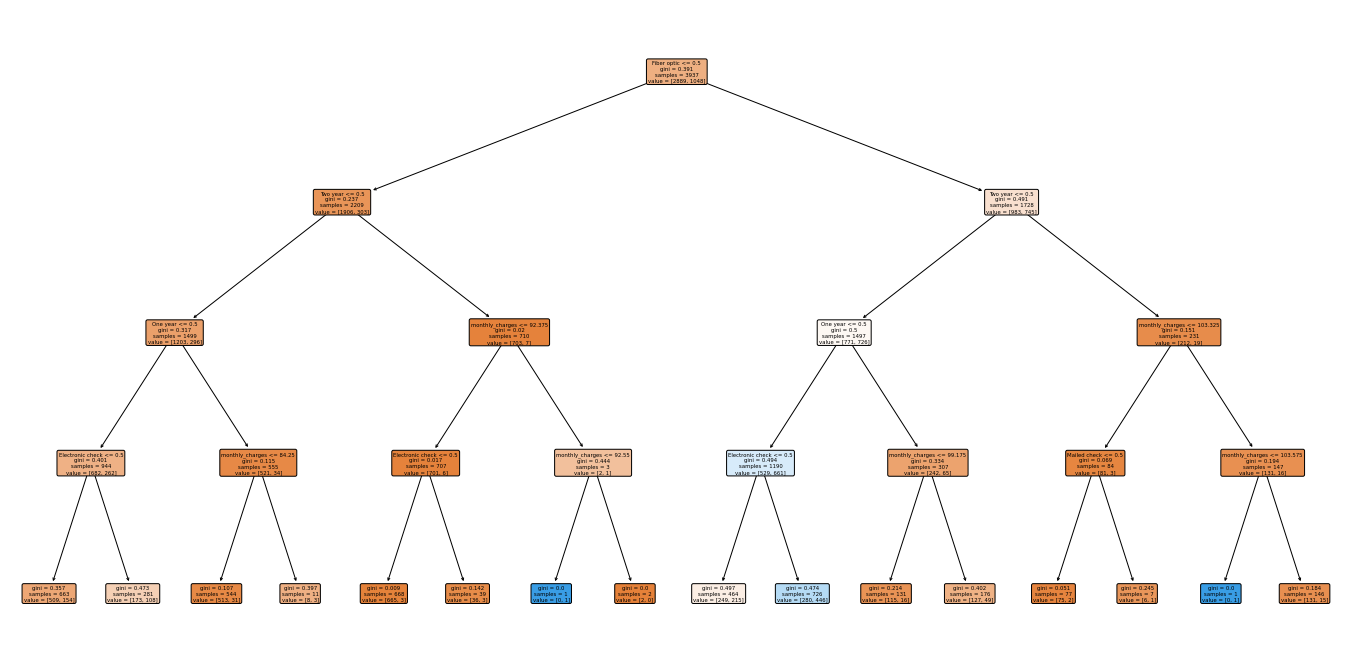

In [61]:
plt.figure(figsize=(24, 12))
plot_tree(
    dt1,
    feature_names=x_train.columns.tolist(),
    filled=True,
    rounded=True
)
plt.show()

In [62]:
confusion_matrix(y_train, y_pred)

array([[2609,  280],
       [ 600,  448]])

In [63]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
tn, fp, fn, tp


(2609, 280, 600, 448)

In [64]:
print("True Positives", tp)
print("False Positives", fp)
print("False Negatives", fn)
print("True Negatives", tn)

print("-------------")

accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)

print("Accuracy is", accuracy)
print("Recall is", recall)
print("Precision is", precision)

True Positives 448
False Positives 280
False Negatives 600
True Negatives 2609
-------------
Accuracy is 0.7764795529591059
Recall is 0.42748091603053434
Precision is 0.6153846153846154


In [65]:
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.90      0.86      2889
           1       0.62      0.43      0.50      1048

    accuracy                           0.78      3937
   macro avg       0.71      0.67      0.68      3937
weighted avg       0.76      0.78      0.76      3937



Random Forest Model

In [66]:
rf1 = RandomForestClassifier(bootstrap=True,
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=2,
                            max_depth=8,
                            random_state=123                           
                           )

In [67]:
rf1.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=2, random_state=123)

In [68]:
print(rf1.feature_importances_)

[0.02255949 0.02682345 0.04234376 0.24045615 0.03241726 0.01448987
 0.13438482 0.01175676 0.03555    0.14835899 0.10785512 0.18300433]


In [69]:
y_pred = rf1.predict(x_train)
y_pred[:5]

array([0, 0, 0, 0, 0])

In [70]:
y_pred_proba = rf1.predict_proba(x_train)
y_pred_proba[:5]

array([[0.99257362, 0.00742638],
       [0.55102057, 0.44897943],
       [0.54937243, 0.45062757],
       [0.99262447, 0.00737553],
       [0.70925319, 0.29074681]])

In [71]:
print('Accuracy of random forest on training set: {:.2f}'
     .format(rf1.score(x_train, y_train)))
print('Accuracy of random forest on validate set: {:.2f}'
     .format(rf1.score(x_validate, y_validate)))

Accuracy of random forest classifier on training set: 0.81
Accuracy of random forest classifier on validate set: 0.79


In [72]:
print(confusion_matrix(y_train, y_pred))

[[2628  261]
 [ 489  559]]


In [73]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
tn, fp, fn, tp

(2628, 261, 489, 559)

In [74]:
print("True Positives", tp)
print("False Positives", fp)
print("False Negatives", fn)
print("True Negatives", tn)

print("-------------")

accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)

print("Accuracy is", accuracy)
print("Recall is", recall)
print("Precision is", precision)

True Positives 559
False Positives 261
False Negatives 489
True Negatives 2628
-------------
Accuracy is 0.809499618999238
Recall is 0.5333969465648855
Precision is 0.6817073170731708


In [75]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      2889
           1       0.68      0.53      0.60      1048

    accuracy                           0.81      3937
   macro avg       0.76      0.72      0.74      3937
weighted avg       0.80      0.81      0.80      3937



Logistic Regression Model

In [76]:
logit1 = LogisticRegression(C=1, class_weight={0:1, 1:99}, random_state=123, intercept_scaling=1, solver='lbfgs')

In [77]:
logit1.fit(x_train, y_train)

LogisticRegression(C=1, class_weight={0: 1, 1: 99}, random_state=123)

In [78]:
print('Coefficient: \n', logit1.coef_)
print('Intercept: \n', logit1.intercept_)

Coefficient: 
 [[ 0.13207726 -0.1411453   0.18887178  0.003429   -0.08101282  0.0913467
   0.63571077  0.05402427  0.52845781  1.46095681 -1.60048227 -3.08137579]]
Intercept: 
 [2.72629136]


In [79]:
# prediction
y_pred = logit1.predict(x_train)
y_pred[:5]

array([0, 1, 1, 0, 1])

In [80]:
# probability
y_pred_proba = logit1.predict_proba(x_train)
y_pred_proba[:5]


array([[0.61190433, 0.38809567],
       [0.01719497, 0.98280503],
       [0.00943067, 0.99056933],
       [0.62465369, 0.37534631],
       [0.01453915, 0.98546085]])

In [81]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit1.score(x_train, y_train)))
print('Accuracy of Logistic Regression classifier on validate set: {:.2f}'
     .format(logit1.score(x_validate, y_validate)))

Accuracy of Logistic Regression classifier on training set: 0.35
Accuracy of Logistic Regression classifier on validate set: 0.35


In [82]:
print(confusion_matrix(y_train, y_pred))

[[ 325 2564]
 [   1 1047]]


In [83]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
tn, fp, fn, tp

(325, 2564, 1, 1047)

In [84]:
print("True Positives", tp)
print("False Positives", fp)
print("False Negatives", fn)
print("True Negatives", tn)

print("-------------")

accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)

print("Accuracy is", accuracy)
print("Recall is", recall)
print("Precision is", precision)

True Positives 1047
False Positives 2564
False Negatives 1
True Negatives 325
-------------
Accuracy is 0.34848869697739393
Recall is 0.9990458015267175
Precision is 0.2899473829963999


In [85]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.11      0.20      2889
           1       0.29      1.00      0.45      1048

    accuracy                           0.35      3937
   macro avg       0.64      0.56      0.33      3937
weighted avg       0.81      0.35      0.27      3937



The Random Forest model is best with 81% accuracy.

In [86]:
# test the model
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rf1.score(x_test, y_test)))

Accuracy of Random Forest classifier on test set: 0.75
